# Regresión Lineal Simple usando sklearn

## Importar bibliotecas

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

## Datos

In [32]:
data = pd.read_csv('SatGpa.csv')

# Primeras 5 lineas
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


## Creamos la regresión

### Declaramos las variables dependiente e independientes

In [33]:
# La variable independiente: 'SAT'
x = data['SAT']

# La variable dependiente: 'GPA'
y = data['GPA']

In [34]:
# La forma del arreglo
x.shape

(84,)

In [35]:
y.shape

(84,)

In [36]:
# Para usar sklearn necesitamos un arreglo de 2D
# Hay que cambiar la forma de los datos

x_matrix = x.values.reshape(84,1)
x_matrix.shape

(84, 1)

### Regresión Lineal
Sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [37]:
# Creamos un objeto regresion lineal
reg = LinearRegression()

In [38]:
# El primer argumento es la varible independiente y el segundo la variable dependiente
# diferente a statsmodels 
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Parametros del constructor
copy_X: se hace una copia de seguridad del arreglo si hay que realizar transfromaciones.
<br>
fit_intercept: calcula explicitamente la constante de regresión.
<br>
n_jobs: número de CPUs usadoa si se quiere paralelizar el método.
<br>
Normalized: los regresores de X se normalizan antes de la regresión restando la media y dividiendo entre la norma L2.
<br>
Estandarizar: restar la media y dividir entre la desviacion estandar
<br>
Normalizar $\neq$ estandarizar. 

# $R^2$

In [39]:
# Para obtener el valor de R-squared
reg.score(x_matrix,y)

0.40600391479679754

# Coeficientes

In [40]:
# Los coeficientes de la regresion
reg.coef_

array([0.00165569])

# Constante de Intersección

In [41]:
# La constante de la regresión
reg.intercept_

0.2750402996602799

Se pueden comparar los resultados obtenidos en scikit-learn con statsModels

# Hacer predicciones

In [42]:
reg.predict(np.array([[1740]]))

array([3.15593751])

In [43]:
# Podemos crear un dataframe con varios valores de SAT
new_data = pd.DataFrame(data=[1740,1760],columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [44]:
# Podemos predecir todo el dataframe 
reg.predict(new_data)

array([3.15593751, 3.18905127])

In [45]:
# Y agregar el resultado de la prediccion en el dataframe
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


# Graficando

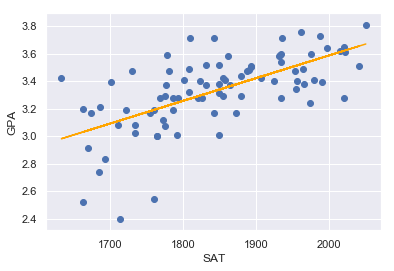

In [46]:
plt.scatter(x,y)

yhat = reg.coef_*x_matrix + reg.intercept_

# Plotting the regression line
plt.plot(x,yhat, c='orange')

plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()